In [2]:
# Charge ma feuille de style pour nbviewer
from IPython.core.display import HTML
from urllib.request import urlopen

url = 'https://framagit.org/debimax/cours-debimax/raw/master/static/custom.css?inline=false'
with urlopen(url) as response:
    styles = response.read().decode("utf8")
styles = "<style>\n{}\n</style>".format(styles)
code='''<p>Document  sous licence CC BY-NC-SA 4.0 ! <img alt="CC BY-NC-SA 4.0" src='https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-nc.eu.svg'  width=80px style="display:inline" />
 issu des cours de divers documents</p>'''
code=styles+code
HTML(code)

# Complexité d’un algorithme

Le calcul de la **complexité** d'un algorithme permet de mesurer sa **performance**. 


<div  style="background-color:#fff8d2 ; border: solid 2px black;">
    <b><span style="color:red;">Définitions</span></b>: (<b>complexités pratique et théorique</b>)
<ul>
    <li>La complexité pratique est une mesure précise des complexités temporelles (temps de calcul) et spatiales (l'espace mémoire requis par le calcul) pour un modèle de machine donné.</li>
    <li> La complexité (théorique) est un ordre de grandeur de ces coûts, exprimé de manière la plus indépendante possible des conditions pratiques d'exécution.</li>
    </ul>
</div>

##  Mesures  pratiques

Créons une fonction `mesure_temps(f, n)` pour mesurer le temps d'exécution d'une fonction.

Pour mesurer le temps d'exécution d'un algorithme  on utilise le module ***time***

In [3]:
import time
import statistics as st

def mesure_temps(f, n):
    # Fonction  qui retourne le temps écoulé pour f(n)
    t = time.time()
    f(n)
    return time.time()-t

Créons maintenant les fonctions ainsi qu'une liste de valeurs

In [4]:
def f1(n):
    h = n // 3600
    m = (n - 3600*h) // 60
    s = n % 60
    return h, m, s


def f2(n):
    somme=0
    for i in range(n):
        somme=somme+i
    return somme


# liste de 5000 valeurs du temps d'executions de [T fi(0),T fi(1),T fi(2),T fi(3),...fi(4999)]
zen1 = [mesure_temps(f1, i) for i in range(5000)]
zen2 = [mesure_temps(f2, i) for i in range(5000)]

Modifiez la valeur de $i$  pour voire le temps d'exécution de la fonction $f_2$.

In [5]:
i=10000
print(f"pour i={i:3} le temps d'exécution est  {mesure_temps(f2,i)}")

pour i=10000 le temps d'exécution est  0.002196788787841797


In [6]:
def f3(n):
    nombre=0
    for i in range(n):
        for j in range(n):
            nombre=nombre+1

def f4(n):
    nombre=0
    for i in range(n):
        for j in range(i):
            nombre=nombre+1

# liste de 500 valeurs du temps d'executions de [T fi(0),T fi(1),T fi(2),T fi(3),...fi(499)]
zen3 = [mesure_temps(f3, j) for j in range(600)]
zen4 = [mesure_temps(f4, j) for j in range(600)]

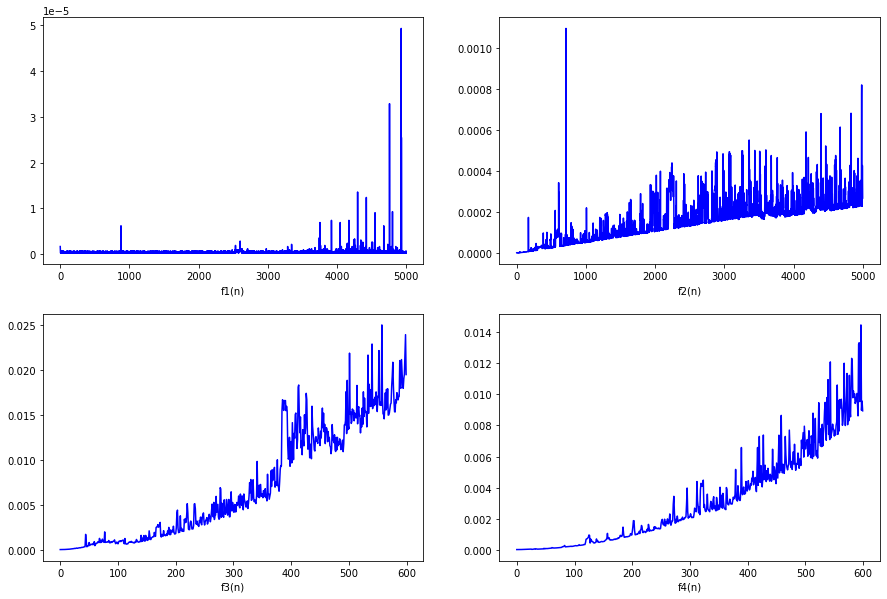

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)     ;ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2,2,3)       ;ax4 = fig.add_subplot(2,2,4)

ax1.set_xlabel('f1(n)')            ;ax2.set_xlabel('f2(n)')
ax3.set_xlabel('f3(n)')            ;ax4.set_xlabel('f4(n)')

ax1.plot(range(len(zen1)), zen1, 'b')   ;ax2.plot(range(len(zen2)), zen2, 'b')
ax3.plot(range(len(zen3)),zen3,'b')      ;ax4.plot(range(len(zen4)),zen4,'b')

plt.show()

Quel type de courbes pouvez vous conjecturer pour les courbes $\mathcal{C}_1, \mathcal{C}_2, \mathcal{C}_3$ et $\mathcal{C}_4$ et conclure alors pour les fonctions $f_1(n), f_2(n), f_3(n)$ et $f_4(n)$

- Il semble que $\mathcal{C}_1$ soit ...
- Il semble que $\mathcal{C}_2$ soit ...
- Il semble que $\mathcal{C}_3$ soit ...
- Il semble que $\mathcal{C}_4$ soit ...

Il est très difficile de prévoir le temps de calcul d'un programme.  
Cela dépend de la,machine, du processeur,  etc ....  

## Mesures théoriques


On cherche à définir une notion de complexité robuste, indépendante
- de l'ordinateur,
- du langage de programmation,
- du compilateur ou de l'interpréteur,
- etc.
Exprimée en fonction de la Taille n des  données à traiter.

<div  style="background-color:#fff8d2 ; border: solid 2px black;">
    <b><span style="color:red;">Méthode</span></b>:  Pour ceci on utilisera un modèle de machine simplifié.
<ul>
    <li> Retenir (opération élémentaire)
    <ul>
        <li> Opérations arithmétiques (additions, multiplications, comparaisons) ;
        <li> Accès aux données en mémoire ;</li>
        <li> Sauts conditionnels et inconditionnels ;</li>
    </ul>
    </li>
    <li> Opération qui prend un temps constant (ou presque).</li>
</ul>
</div>

La **complexité** en temps d'un algorithme sera exprimé par une fonction, notée ***T*** (pour Time).  
En toute rigueur, on peut en effet distinguer deux formes de complexité en temps :
- la complexité dans le **meilleur des cas** : c'est la situation la plus favorable,  
  par exemple : recherche d'un élément situé à la première position d'une liste
-  la complexité dans le **pire des cas** : c'est la situation la plus défavorable,  
  par exemple : recherche d'un élément dans une liste alors qu'il n'y figure pas

On calculera le plus souvent la complexité dans le pire des cas, car elle est la plus pertinente. Il vaut mieux en effet toujours envisager le pire.

**Exemple 1:**

```python
def convert(n):
    h = n // 3600            # affectation + opération  ...
    m = (n - 3600*h) // 60   # affectation + opération  ...
    s = n % 60               # affectation + opération  ...
    return h,m,s
```

Donc la complexité est $.........$ et on note $T=...$

**Exemple 1:**

```python
def convert(n):
    h = n // 3600            # affectation + opération  2
    m = (n - 3600*h) // 60   # affectation + opération  4
    s = n % 60               # affectation + opération  2
    return h,m,s
```

Donc la complexité est $2+4+2=8$ et on note $T=8$.

**Exemple 2:**


```python
def exemple2(n):
    somme=0              # Affectation: ...
    for i in range(n):   # Itérations:  ...
        somme=somme+i    # affectation et somme ...
    return somme
```

Donc la complexité est T=....... 

**Exemple 2:**


```python
def exemple2(n):
    somme=0              # Affectation: 1
    for i in range(n):   # Itérations:  n
        somme=somme+i    # affectation et somme 2
    return somme
```

Donc la complexité est $T=1+2+2+\ldots+2=1+n\times 2=2n+1$

**Exemple 3:**

```python
def f3(n):
    nombre=0                   # ... affectations
    for i in range(n):         # ... fois
        for j in range(n):     # ... fois
            nombre=nombre+1    # ... affectations et  ...  opérations
```

Donc la complexité est T= ....... 

**Exemple 3:**

```python
def f3(n):
    nombre=0                   # 1 affectations
    for i in range(n):         # itérations n
        for j in range(n):     # itérations n
            nombre=nombre+1    # 1 affectations et  1  opérations
```

Donc la complexité est $T= 1+n\times n \times 2=2n^2+1$  

## Ordre de grandeur

Pour comparer des algorithmes, il n'est pas nécessaire d'utiliser la fonction ***T***, mais seulement l'ordre de **grandeur asymptotique**, noté $\boldsymbol{\mathcal{O}}$  ("grand O").

La définition exacte est compliquée à comprendre et n'est pas au programme de 1°.

<!--
Une fonction $T(n)$ est en $\mathcal{O}(f(n))$ ("en grand O de f(n)") si : $\exists n_0\in\mathbb{N},\exists c\in \mathbb{R},\forall n\geqslant n_0:|T(n)|\leqslant c|f(n)|$

Autrement dit :

$T(n)$ est en $\mathcal{O}(f(n))$ s'il existe un seuil $n_0$ à partir duquel la fonction $T$ est toujours dominée par la fonction $f$, à une constante multiplicative fixée $c$ près.
-->

**Exemples 1:**  $T=8$ C'est une fonction constante  (fonction de n).    
On dit la complexité cette fonction (algorithme) est constante. La complexité est en $\mathcal{O}(1)$.

**Exemples 2:**  $T=2n+1$ C'est une fonction affine.    
La complexité cette fonction est linéaire ou la complexité est en $\mathcal{O}(n)$.

**Exemples 3:**  $T=2n^2+1$ C'est une fonction polynôme du second degrés.  
La complexité cette fonction est quadratique ou la complexité est en $\mathcal{O}(n^2)$. 

<img src="https://megamaths.hd.free.fr/static/complexite.svg" width=100%>


<!--
<img class="alignnone size-full wp-image-7115" src="http://info.blaisepascal.fr/wp-content/uploads/2019/11/complexite.png" alt="" srcset="http://info.blaisepascal.fr/wp-content/uploads/2019/11/complexite.png 2730w, http://info.blaisepascal.fr/wp-content/uploads/2019/11/complexite-300x89.png 300w, http://info.blaisepascal.fr/wp-content/uploads/2019/11/complexite-768x229.png 768w, http://info.blaisepascal.fr/wp-content/uploads/2019/11/complexite-1024x305.png 1024w" sizes="(max-width: 2730px) 100vw, 2730px" width="2730" height="814"></p>
-->

## Quelques résultats de mathématiques


<table width=100%>
<tr>
    <th>Prop:</th><th>$S=0+1+2+...+n-1=\dfrac{n(n-1)}{2}$</th><th></th><th> et  </th><th></th><th>$0+1+2+...+n=\dfrac{(n+1)n}{2}$</th>
    </tr>
</table>

<!--Prop: $S=0+1+2+...+n-1=\dfrac{n(n-1}{2}$  et  $0+1+2+...+n=\dfrac{(n+1)n}{2}$-->

Démonstration:

\begin{align*}
 S=&  0  &+&  1  &+ ...&+&(n-2) &+& (n-1)\\
 S=&(n-1)&+&(n-2)&+ ...&+&  1  &+& 0  \\
 +   ---& --- &---&-- & --- &---& --&---& -- & -- \\ 
 2S=&(n-1)&+&(n-1)&+ ...&+&(n-1)&+&(n-1)\\
 2S=&n(n-1)\\
 S=&\dfrac{n(n-1)}{2}\\
\end{align*}

In [20]:
n=5
for i in range(n): 
    for j in range(i):
        print("j=", j,  end=' ',  sep='')
    print(f"i={i}")

i=0
j=0 i=1
j=0 j=1 i=2
j=0 j=1 j=2 i=3
j=0 j=1 j=2 j=3 i=4


## Exemple  de calcul de complexité

***Exemple 4:***

```python
def f4(n):
    nombre=0                 # affectation: ...
    for i in range(n):       # itération: ...
        for j in range(i):   # itération: ...
            nombre=nombre+1  # affectations et  addition: ... 
    return nombre
```



***Exemple 4:***

```python
def f4(n):
    nombre=0                  # affectation: 1
    for i in range(n):        # itération: n  
        for j in range(i):    # itération: i
            nombre=nombre+1   # affectations et  addition: 2 
    return nombre
```

Le nombre d'opérations est:   
$1+\left( 0\times 2+1\times 2+2\times 2+...+(n-1)\times 2\right)=$  
$1+\left( 0+1+2+...+(n-1)\right)\times 2=1+\dfrac{n^2-n}{2}\times 2=1+n^2-n=n^2-n+1$

donc cet algorithme est en $\mathcal{O}(n^2)$

***Exemple 5***

```python
def factorielle(n):
    fact = 1             # affectation : 1
    i = 2                # affectation : 1
    while i <= n:        # itérations : au plus n-1    et    comparaison : 1
        fact = fact * i  # multiplication et affectation : 2
        i = i + 1        # addition et affectation : 2
    return fact          #
```

$T=2+ (n-1)\times 5= 5n-3$  donc la complexité de cet algorithme est $\mathcal{O}(n)$

**Exemple 6**: (**dichotomie**)

On rappelle la fonction  `CplusCmoinsJoueur(min, max)` que nous avons utilisé dans le cours sur la dichotomie.

>**fonction**: CplusCmoinsJoueur(min, max) 
>>a $\leftarrow$ min  
>>b $\leftarrow$ max  
>>nombre_essais <- 0  
>>**tant que** reponse $\neq$ "Bravo" **faire**  
>>>nombre_propose $\leftarrow (a + b)//2$   
>>>nombre_essais $\leftarrow$ nombre_essais+1  
>>>reponse $\leftarrow$ CplusCmoinsMachine(nombre_propose)  
>>>**si** reponse = "C'est plus" **alors**   
>>>>a $\leftarrow$ nombre_propose  
>>>
>>>**si** reponse = "C’est moins" **alors**   
>>>>b $\leftarrow$ nombre_propose  
>>
>>retourner nombre_essais  

1. On exécute la fonction  `CplusCmoinsJoueur(1, 8)`  Combien de fois exécute t on dans le pire des cas la boucle tant que?

1. ` CplusCmoinsJoueur(1, 8)`  
On divise par deux l'intervalle $[1,8]$.   
Dans le pire des cas si le nombre mystere est 1 (ou 8) on obtient pour l'intervalle $[a;b]$ lorsque l'on teste  $reponse \neq "Bravo"$
 - [1;8]   
 - [1;4]
 - [1;2]
 - [1;1]  Le nombre est alors trouvé mais la boucle n'est pas effectuée. On a donc effectué 3 fois la boucle.

2. Même question  pour 
  1. `CplusCmoinsJoueur(1, 7)`
  2. `CplusCmoinsJoueur(1, 1024)`
  3.  `CplusCmoinsJoueur(1, 1000)`

2. 1. $[1;7] \quad  [1;4] \quad  [1;2] \quad [1;1]$   La réponse est encore 3.   
 2. $[1;1024] \quad   [1;512] \quad  [1;256] \quad     [1;128] \quad   [1;64]  \quad  [1;32] \quad   [1;16] \quad   [1;8] \quad   [1;4]  \quad [1;2]  \quad  [1;1]$   
La réponse est 10.  
 3. $[1;1000] \quad   [1;500] \quad  [1;250] \quad     [1;125] \quad   [1;62]  \quad  [1;31] \quad   [1;15] \quad   [1;7] \quad   [1;3] \quad  [1;1]$    La réponse est 9.

3. Même question pour `CplusCmoinsJoueur(1, n)`.  En déduire la complexité de la fonction `CplusCmoinsJoueur(1, n)`.

3.  Comme on divise par deux l'intervalle $[1;n]$  on exécute $E(\log n)$  boucles  où  **E()**  est la fonction  partie entière.
    $E(\log 1024)=E(\log 2^{10})=E(10)=10\quad E(\log 1000)\approx E(9,96)=9$.  La  complexité est donc  $\mathcal{O}\left( \log(n) \right)$
    

<center>
<table>
<tbody>
<tr  width="100%">
<th style="text-align: left; background-color: #FF6600; color:#FFFFFF;"   width="50%" >$\mathcal{O}$</th>
<th style="text-align: left; background-color: #FF6600; color:#FFFFFF;"   width="50%">Type de complexité</th>
</tr>
<tr style="background-color: #fbe9e4;">
<td style="text-align: left;">$\mathcal{O}(1)$</td>
<td style="text-align: left;">constante</td>
</tr>
<tr style="background-color: #ffffff;">
<td style="text-align: left;">$\mathcal{O}(log(n))$</td>
<td style="text-align: left;">logarithmique</td>
</tr>
<tr style="background-color: #fbe9e4;">
<td style="text-align: left;">$\mathcal{O}(n)$</td>
<td style="text-align: left;">linéaire</td>
</tr>
<tr style="background-color: #ffffff;">
<td style="text-align: left;">$\mathcal{O}(n\times log(n))$</td>
<td style="text-align: left;">quasi-linéaire</td>
</tr>
<tr style="background-color: #fbe9e4;">
<td style="text-align: left;">$\mathcal{O}(n^2)$</td>
<td style="text-align: left;">quadratique</td>
</tr>
<tr style="background-color: #ffffff;">
<td style="text-align: left;">$\mathcal{O}(n^3)$</td>
<td style="text-align: left;">cubique</td>
</tr>
<tr style="background-color: #fbe9e4;">
<td style="text-align: left;">$\mathcal{O}(2^n)$</td>
<td style="text-align: left;">exponentielle</td>
</tr>
<tr style="background-color: #ffffff;">
<td style="text-align: left;">$\mathcal{O}(n!)$</td>
<td style="text-align: left;">factorielle</td>
</tr>
</tbody>
</table>    
</center>